In [2]:
#|default_exp app

# Race car classifier

In [5]:
!pip install -Uqq gradio fastai

In [6]:
#|export
from fastai.vision.all import *
import gradio as gr

In [34]:
#|export
learner = load_learner("model.pkl")

categories = "Formula 1","Indy","Nascar"

def classify_image(img):
    pred,_,probs = learner.predict(img)
    return dict(zip(categories, map(float, probs)))

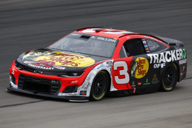

In [35]:
im = PILImage.create("nascar.jpg")
im.thumbnail((192,192))
im

In [36]:
classify_image(im)

{'Formula 1': 0.0005179690779186785,
 'Indy': 0.0015000402927398682,
 'Nascar': 0.9979819059371948}

In [39]:
#|export
gr.Interface(
    fn=classify_image,
    inputs=gr.components.Image(shape=(192,192)), 
    outputs=gr.components.Label(), 
    examples=["formula-1.jpg", "indy.jpg", "nascar.jpg"],
).launch(inline=False)

Running on local URL:  http://127.0.0.1:7862/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x15e40fbe0>, 'http://127.0.0.1:7862/', None)

In [41]:
from nbdev.export import notebook2script

In [42]:
notebook2script("app.ipynb")

Converted app.ipynb.
